In [1]:
# Import all required libraries

import pandas as pd 
from glob import glob
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [2]:
# We need a list containing all of the columns we'll use for our model

filtered_columns =  [
 'Schl_Bus_Fl',
 'Rr_Relat_Fl',
 'Active_School_Zone_Fl',
 'Crash_Date',
 'Crash_Time',
 'Toll_Road_Fl',
 'Crash_Speed_Limit',
 'Road_Constr_Zone_Fl',
 'Road_Constr_Zone_Wrkr_Fl',
 'At_Intrsct_Fl',
 'Wthr_Cond_ID',
 'Light_Cond_ID',
 'Road_Type_ID',
 'Road_Algn_ID',
 'Surf_Cond_ID',
 'Intrsct_Relat_ID',
 'FHE_Collsn_ID',
 'Obj_Struck_ID',
 'Othr_Factr_ID',
 'Road_Part_Adj_ID',
 'Road_Cls_ID',
 'Road_Relat_ID',
 'Phys_Featr_1_ID',
 'Phys_Featr_2_ID',
 'Pop_Group_ID',
 'Day_of_Week',
 'Base_Type_ID',
 'Surf_Type_ID',
 'Adt_Adj_Curnt_Amt',
 'Trk_Aadt_Pct',
 'Curve_Type_ID',
 'Curve_Lngth',
 'Cd_Degr',
 'Delta_Left_Right_ID',
 'Dd_Degr',
 'WDCode_ID',
 'Crash_Sev_ID']

In [3]:
# We also need a list of just the predictor columns

predictor_columns =  [
 'Schl_Bus_Fl',
 'Rr_Relat_Fl',
 'Active_School_Zone_Fl',
 'Crash_Date',
 'Crash_Time',
 'Toll_Road_Fl',
 'Crash_Speed_Limit',
 'Road_Constr_Zone_Fl',
 'Road_Constr_Zone_Wrkr_Fl',
 'At_Intrsct_Fl',
 'Wthr_Cond_ID',
 'Light_Cond_ID',
 'Road_Type_ID',
 'Road_Algn_ID',
 'Surf_Cond_ID',
 'Intrsct_Relat_ID',
 'FHE_Collsn_ID',
 'Obj_Struck_ID',
 'Othr_Factr_ID',
 'Road_Part_Adj_ID',
 'Road_Cls_ID',
 'Road_Relat_ID',
 'Phys_Featr_1_ID',
 'Phys_Featr_2_ID',
 'Pop_Group_ID',
 'Day_of_Week',
 'Base_Type_ID',
 'Surf_Type_ID',
 'Adt_Adj_Curnt_Amt',
 'Trk_Aadt_Pct',
 'Curve_Type_ID',
 'Curve_Lngth',
 'Cd_Degr',
 'Delta_Left_Right_ID',
 'Dd_Degr',
 'WDCode_ID']

In [4]:
# Import the data to a pandas data frame

root = "extract_public_2018_20200825003448226_69851_20190101-20191231Texas/"
files = glob(root + '*/*_crash_*.csv')
get_df = lambda f: pd.read_csv(f)
dfdict = {f: pd.read_csv(f) for f in files}
df = pd.concat(dfdict)
df.reset_index()

,level_0,level_1,Crash_ID,Crash_Fatal_Fl,Cmv_Involv_Fl,Schl_Bus_Fl,Rr_Relat_Fl,Medical_Advisory_Fl,Amend_Supp_Fl,Active_School_Zone_Fl,...,Nonincap_Injry_Cnt,Poss_Injry_Cnt,Non_Injry_Cnt,Unkn_Injry_Cnt,Tot_Injry_Cnt,Death_Cnt,MPO_ID,Investigat_Service_ID,Investigat_DA_ID,Investigator_Narrative
0,extract_public_2018_20200825003448226_69851_20...,0,15657177,N,N,N,N,N,Y,N,...,0,0,0,1,0,0,NaN,35.0,NaN,NaN
1,extract_public_2018_20200825003448226_69851_20...,1,16406486,N,N,N,N,N,Y,N,...,0,0,1,1,0,0,NaN,23.0,NaN,NaN
2,extract_public_2018_20200825003448226_69851_20...,2,16473665,N,N,N,N,N,Y,N,...,1,0,1,0,1,0,NaN,35.0,NaN,NaN
3,extract_public_2018_20200825003448226_69851_20...,3,16871051,N,Y,N,N,N,Y,N,...,0,0,2,0,0,0,282.0,NaN,NaN,NaN
4,extract_public_2018_20200825003448226_69851_20...,4,16995273,N,N,N,N,N,Y,N,...,0,1,6,0,1,0,15.0,53.0,61.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648332,extract_public_2018_20200825003448226_69851_20...,54572,17777131,N,N,N,N,N,N,N,...,0,0,0,2,0,0,NaN,29.0,14.0,NaN
648333,extract_public_2018_20200825003448226_69851_20...,54573,17779640,N,N,N,N,N,N,N,...,0,0,2,0,0,0,15.0,NaN,NaN,NaN
648334,extract_public_2018_20200825003448226_69851_20...,54574,17783015,N,N,N,N,N,N,N,...,0,0,0,1,0,0,NaN,411.0,NaN,NaN
648335,extract_public_2018_20200825003448226_69851_20...,54575,17801355,N,N,N,N,N,N,N,...,0,0,1,0,0,0,15.0,NaN,NaN,NaN


In [5]:
# Filter the imported data based on our selected features.

df_filtered = df[filtered_columns]
#df_filtered = df

In [6]:
# Drop all rows where there is no crash severity ID listed. This is our target column, so these rows are useless

df_filtered = df_filtered[df_filtered.Crash_Sev_ID != 0]

In [7]:
# Let's also drop all rows where the speed limit is -1, which is a effectively a "NaN" value.
df_filtered = df_filtered[df_filtered['Crash_Speed_Limit']!=-1]

# df_filtered.dropna(inplace=True)

In [8]:
df_filtered['Crash_Time'] = pd.to_datetime(df_filtered['Crash_Time']).astype('int64')
df_filtered['Crash_Date'] = pd.to_datetime(df_filtered['Crash_Date']).astype('int64')
df_filtered.Day_of_Week.replace(to_replace=r'^MON$', value=1, regex=True, inplace=True)
df_filtered.Day_of_Week.replace(to_replace=r'^TUE$', value=2, regex=True, inplace=True)
df_filtered.Day_of_Week.replace(to_replace=r'^WED$', value=3, regex=True, inplace=True)
df_filtered.Day_of_Week.replace(to_replace=r'^THU$', value=4, regex=True, inplace=True)
df_filtered.Day_of_Week.replace(to_replace=r'^FRI$', value=5, regex=True, inplace=True)
df_filtered.Day_of_Week.replace(to_replace=r'^SAT$', value=6, regex=True, inplace=True)
df_filtered.Day_of_Week.replace(to_replace=r'^SUN$', value=7, regex=True, inplace=True)


In [9]:
df_filtered.replace(to_replace=r'^N$', value=0, regex=True, inplace=True)
df_filtered.replace(to_replace=r'^Y$', value=1, regex=True, inplace=True)

In [10]:
scaler = MinMaxScaler(feature_range=(0, 1))

for i in predictor_columns:
    values = df_filtered[i].values
    values = values.reshape((len(values), 1))

    value_name = "norm_" + i
    df_filtered[value_name] = scaler.fit_transform(values)

    df_filtered.drop(i, axis=1, inplace=True)
    df_filtered.rename(columns={value_name : i}, inplace=True)

In [11]:
for i in df_filtered.columns.to_list():
    df_filtered[i].fillna(df_filtered[i].mean(), inplace = True)

In [12]:
#for i in df_filtered.columns.tolist():
#    print(df_filtered[i].value_counts())
#    print('\n')

In [13]:
X = df_filtered[predictor_columns].values
y = df_filtered["Crash_Sev_ID"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
dtc = DecisionTreeClassifier(criterion="entropy", max_depth = 3)
dtc.fit(X_train,y_train)
y_hat = dtc.predict(X_test)

In [14]:
accuracy_score(y_test, y_hat)

0.7015793119776914

In [15]:
recall_score(y_test, y_hat, average=None)

array([0.        , 0.04638062, 0.        , 0.        , 0.9946211 ])

In [16]:
precision_score(y_test, y_hat, average=None)

array([0.        , 0.31727681, 0.        , 0.        , 0.706899  ])

In [17]:
f1_score(y_test, y_hat, average=None)

array([0.        , 0.08093054, 0.        , 0.        , 0.82643357])

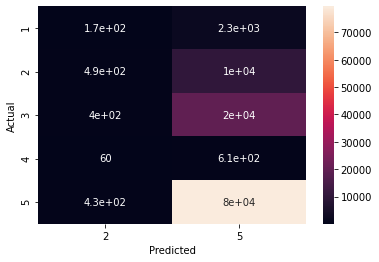

In [18]:
confusion_matrix = pd.crosstab(y_test, y_hat, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
plt.show()

In [12]:
count_class_1, count_class_2, count_class_3, count_class_4, count_class_5 = df_filtered.Crash_Sev_ID.value_counts()
df_class_1 = df_filtered[df_filtered['Crash_Sev_ID'] == 1]
df_class_2 = df_filtered[df_filtered['Crash_Sev_ID'] == 2]
df_class_3 = df_filtered[df_filtered['Crash_Sev_ID'] == 3]
df_class_4 = df_filtered[df_filtered['Crash_Sev_ID'] == 4]
df_class_5 = df_filtered[df_filtered['Crash_Sev_ID'] == 5]

df_class_5_under = df_class_5.sample(count_class_5)
df_class_3_under = df_class_3.sample(count_class_5)
df_class_2_under = df_class_2.sample(count_class_5)
df_class_1_under = df_class_1.sample(count_class_5)

df_test_under = pd.concat([df_class_5_under, df_class_3_under, df_class_2_under, df_class_1_under, df_class_4], axis=0)

df_class_5_over = df_class_5.sample(count_class_1, replace=True)
df_class_4_over = df_class_4.sample(count_class_1, replace=True)
df_class_3_over = df_class_3.sample(count_class_1, replace=True)
df_class_2_over = df_class_2.sample(count_class_1, replace=True)
df_class_1_over = df_class_1.sample(count_class_1, replace=True)

df_test_over = pd.concat([df_class_4_over, df_class_3_over, df_class_2_over, df_class_1_over, df_class_5], axis=0)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


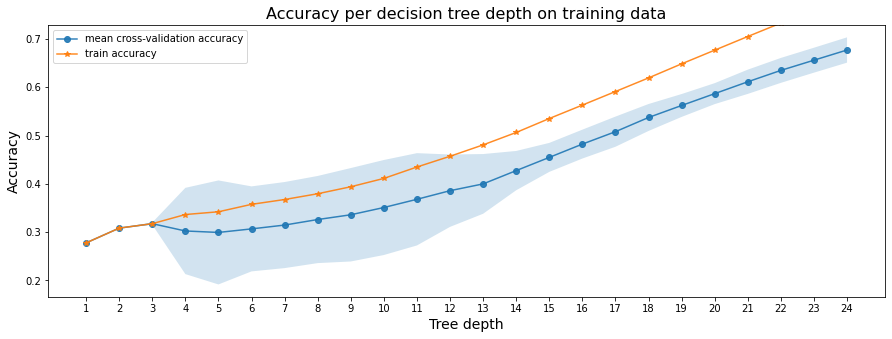

In [14]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(X, y, tree_depths, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
        print(depth)
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
  
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

X_train = df_test_over[predictor_columns].values
y_train = df_test_over["Crash_Sev_ID"]

# fitting trees of depth 1 to 24
sm_tree_depths = range(1,25)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_train, y_train, sm_tree_depths)

# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')

25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


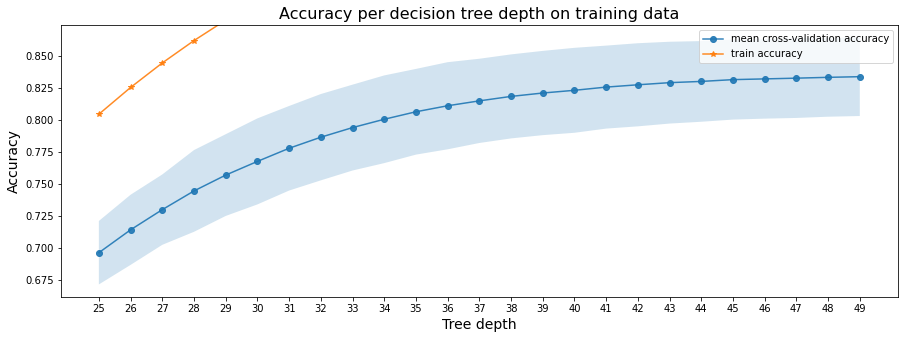

In [15]:
sm_tree_depths = range(25,50)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_train, y_train, sm_tree_depths)

# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')

In [17]:
idx_max = sm_cv_scores_mean.argmax()
sm_best_tree_depth = sm_tree_depths[idx_max]
sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
print('The depth-{} tree achieves the best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      sm_best_tree_depth, round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))

The depth-49 tree achieves the best mean cross-validation accuracy 83.36224 +/- 1.53644% on training dataset


50
51
52
53
54
55
56
57
58
59


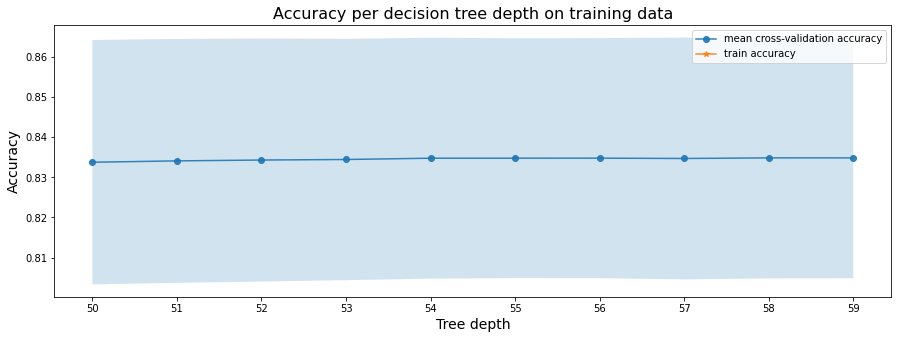

In [18]:
sm_tree_depths = range(50,60)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_train, y_train, sm_tree_depths)

# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')

In [19]:
idx_max = sm_cv_scores_mean.argmax()
sm_best_tree_depth = sm_tree_depths[idx_max]
sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
print('The depth-{} tree achieves the best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      sm_best_tree_depth, round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))

The depth-58 tree achieves the best mean cross-validation accuracy 83.48652 +/- 1.50255% on training dataset


60
61
62
63
64
65
66
67
68
69


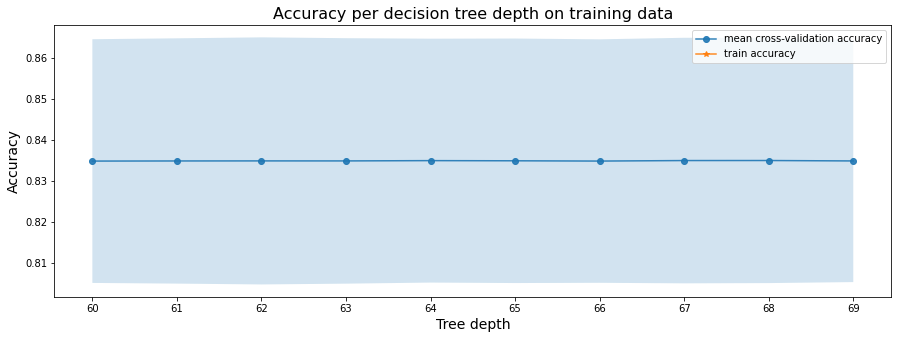

In [20]:
sm_tree_depths = range(60,70)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_train, y_train, sm_tree_depths)

# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')

In [22]:
idx_max = sm_cv_scores_mean.argmax()
sm_best_tree_depth = sm_tree_depths[idx_max]
sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
print('The depth-{} tree achieves the best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      sm_best_tree_depth, round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))

The depth-68 tree achieves the best mean cross-validation accuracy 83.49672 +/- 1.49975% on training dataset


In [20]:
X = df_test_over[predictor_columns].values
y = df_test_over["Crash_Sev_ID"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
dtc_over = DecisionTreeClassifier(criterion="entropy", max_depth = 3)
dtc_over.fit(X_train,y_train)
y_hat = dtc_over.predict(X_test)

In [21]:
accuracy_score(y_test, y_hat)

0.3208201155877721

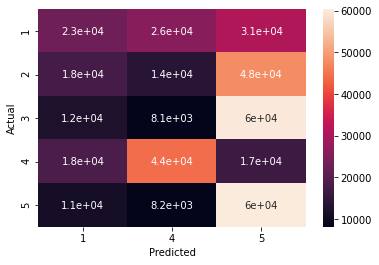

In [22]:
confusion_matrix = pd.crosstab(y_test, y_hat, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
plt.show()

In [23]:
X = df_test_under[predictor_columns].values
y = df_test_under["Crash_Sev_ID"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
dtc_under = DecisionTreeClassifier(criterion="entropy", max_depth = 3)
dtc_under.fit(X_train,y_train)
y_hat = dtc_under.predict(X_test)

In [24]:
accuracy_score(y_test, y_hat)

0.325

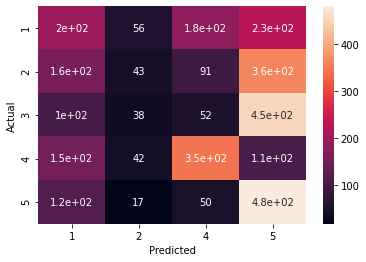

In [25]:
confusion_matrix = pd.crosstab(y_test, y_hat, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
plt.show()

In [53]:
from scipy.stats import chi2_contingency


In [55]:
from sklearn.decomposition import PCA

X = df_test_over[predictor_columns].values

pca = PCA(n_components=10)
X = pca.fit_transform(X)

y = df_test_over["Crash_Sev_ID"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
dtc = DecisionTreeClassifier(criterion="entropy", max_depth = 30)
dtc.fit(X_train,y_train)
y_hat = dtc.predict(X_test)

accuracy_score(y_test, y_hat)

0.8768194022690567

In [56]:
from sklearn.decomposition import PCA

X = df_test_over[predictor_columns].values

pca = PCA(n_components=10)
X = pca.fit_transform(X)

y = df_test_over["Crash_Sev_ID"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
dtc = DecisionTreeClassifier(criterion="entropy", max_depth = 40)
dtc.fit(X_train,y_train)
y_hat = dtc.predict(X_test)

accuracy_score(y_test, y_hat)

0.9183651940653892

In [58]:
from imblearn.over_sampling import SMOTE

X = df_filtered[predictor_columns].values

y = df_filtered["Crash_Sev_ID"]

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_sample(X, y)

pca = PCA(n_components=10)
X_sm = pca.fit_transform(X_sm)

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=3)
dtc = DecisionTreeClassifier(criterion="entropy", max_depth = 40)
dtc.fit(X_train,y_train)
y_hat = dtc.predict(X_test)

accuracy_score(y_test, y_hat)

0.7078063717235984

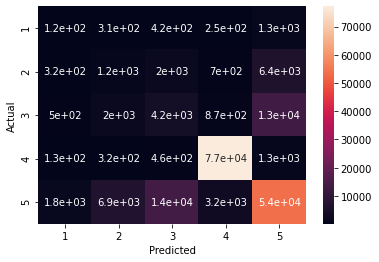

In [59]:
confusion_matrix = pd.crosstab(y_test, y_hat, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
plt.show()

In [61]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_hat=clf.predict(X_test)

In [62]:
accuracy_score(y_test, y_hat)

0.8081747483277982

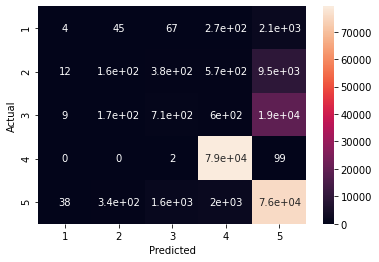

In [63]:
confusion_matrix = pd.crosstab(y_test, y_hat, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
plt.show()